# Milestone 2: Exploratory Data Analysis
##### Eduardo Sequeira
---

For this milestone, **exploratory data analysis (EDA)** will be conducted on the selected dataset for the project.

## 1. Introduction

For this EDA, there are two main questions that we seek to answer:
1. Which videogame *genre* tends to *sell better / more*?
2. What is the *correlation* between *game ratings, sales, and genre*?
3. When did ratings begin for videogames?

The first question is a basic, direct, comparison. The second question is more towards divining the relationships between the three critiera mentioned. The third question, for curiosity, is based around when were the first ratings applied to videogames, or start becoming something expected?

Before carrying out the EDA, we need to first clean the dataset. But before cleaning the dataset, we must first understand it and identify what data we need to answer the above questions.

## 2. Reviewing the Data

To begin reviewing the data, we must first load in the required libraries for the EDA and the raw dataset. Once this is done, we can start analyzing the data and move from selection to cleaning, to then performing the analysis. 

In [15]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [16]:
# This is to go and fetch the raw dataset file and load it in

# Read the raw data from file 'filename.csv' 
rawdata = pd.read_csv("https://github.com/data301-2020-winter2/course-project-group_1019/blob/main/data/raw/Video_Games_Sales_as_at_22_Dec_2016.csv?raw=true.csv") 

# Preview the basic information of the loaded data 
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Dataset Information

When looking at the information of the dataset, we see that the columns whose values are words are of the object (strings) datatype, and the columns which contain numerical values are of the float datatype, which makes sense. We also see that there is a fair difference in the non-null counts for the data between columns, which means that effectively, the number of complete rows (no missing values or NaNs) will be significantly lower than the total names of videogames in the dataset, 16717.

In [17]:
# Preview the first 5 lines of the loaded data 
rawdata.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


From the above head, showing us the first five lines of the raw data, we see that there are columns and rows which contain NaNs. When cleaning and manipulating the data at the end, we will want to make sure that we have no NaNs present.

However, before beginning to clean, let's select the data we actually need to answer the two above questions. We can do this by looking at the columns that are present in the dataset.

In [18]:
# Read the column names that we have
print(rawdata.columns.values)


['Name' 'Platform' 'Year_of_Release' 'Genre' 'Publisher' 'NA_Sales'
 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales' 'Critic_Score'
 'Critic_Count' 'User_Score' 'User_Count' 'Developer' 'Rating']


### Column Analysis

From the column name list above, to answer our questions, we really only need to have three columns: the **Genre**, **Global_Sales**, and **Rating** columns. With these three columns, we will be able to answer which videogame genres sell better, and find if there are any correlations between the ratings, sales and the genres. For curiosity and to address the third question, we will also need the **Year_of_Release** column.


###  Column Selection

Let's begin by selecting only the columns that are of interest to us to answer our questions: **Year_of_Release**, **Genre**, **Global_Sales**, and **Rating**. We will also keep the column **Name** just for interest, for summarizing later to give an example of some games that exist in each category.

In [19]:
# Select only the Year_of_Release, Genre, Global_Sales, and Rating columns

# Create a new edited raw dataset from the original raw dataset
rawdataedit = rawdata

# Filters the five columns that we are interested in and saves them over the dataset
rawdataedit = rawdataedit.filter(['Name','Year_of_Release','Genre','Global_Sales','Rating'])

rawdataedit.head()


,Name,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,2006.0,Sports,82.53,E
1,Super Mario Bros.,1985.0,Platform,40.24,NaN
2,Mario Kart Wii,2008.0,Racing,35.52,E
3,Wii Sports Resort,2009.0,Sports,32.77,E
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37,NaN


### Data Cleaning

Now that we only have the four columns of interest, we can proceed to the next task that  will be cleaning the data, so that there are no NaNs in four main columns.

In [20]:
# Establishing a new dataset that will be dataclean from the latest edited rawdata
dataclean = rawdataedit.dropna()

# Display the head and the info of the clean dataset
display(dataclean.head())
print("\n")
dataclean.info()

,Name,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,2006.0,Sports,82.53,E
2,Mario Kart Wii,2008.0,Racing,35.52,E
3,Wii Sports Resort,2009.0,Sports,32.77,E
6,New Super Mario Bros.,2006.0,Platform,29.80,E
7,Wii Play,2006.0,Misc,28.92,E




<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 0 to 16710
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9769 non-null   object 
 1   Year_of_Release  9769 non-null   float64
 2   Genre            9769 non-null   object 
 3   Global_Sales     9769 non-null   float64
 4   Rating           9769 non-null   object 
dtypes: float64(2), object(3)
memory usage: 457.9+ KB


From the above, we see that we have now we have a total of five columns that we are interested in, and that all five columns have the same number of rows, 9769, which is perfect and what we want. We also know now that each of these rows are "complete" meaning that there are no longer any NaNs in our dataset.

Turn K-A to E

In [61]:

# Takes the indicies of the dataclean dataframe
index = dataclean.index
changes = 0

for rownumber in dataclean.index:
    if dataclean.Rating[rownumber] == 'K-A':
        dataclean.Rating[rownumber] = 'E'
        changes += 1
    
print('Number of changes made:', changes)

Number of changes made: 3


<ipython-input-61-1cb51b2cc8df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean.Rating[rownumber] = 'E'


### Setting the Data Types

As of now, the columns **Name**, **Genre** and **Rating** are set as object, and we should change **Genre** and **Rating** to be categories. We will want to do this because we know that the entries in these columns will be from a known set of variables. **Name** should be converted into a string because it is the name of the videogame in question. For the **Global_Sales**, we will want to keep this as it, because float64 will give us a numerical value with a decimal point for more precision. For **Year_of_Release**, we will convert this to an int64 datatype because we know that the year is simply the year, not needing decimal places for this. 

In [62]:
# Set columns Genre and Rating to be categories and check the info again
dataclean['Name'] = dataclean['Name'].astype("string")
dataclean['Year_of_Release'] = dataclean['Year_of_Release'].astype('int64')
dataclean['Genre'] = dataclean['Genre'].astype('category')
dataclean['Rating'] = dataclean['Rating'].astype('category')

# Check if the Dtype for columns Genre and Rating are now changed to be category, and Year_of_Release is str
display(dataclean.head())
print("\n")
display(dataclean.info())


<ipython-input-62-4216a8572b2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Name'] = dataclean['Name'].astype("string")
<ipython-input-62-4216a8572b2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Year_of_Release'] = dataclean['Year_of_Release'].astype('int64')
<ipython-input-62-4216a8572b2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,Name,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,2006,Sports,82.53,E
2,Mario Kart Wii,2008,Racing,35.52,E
3,Wii Sports Resort,2009,Sports,32.77,E
6,New Super Mario Bros.,2006,Platform,29.80,E
7,Wii Play,2006,Misc,28.92,E




<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 0 to 16710
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             9769 non-null   string  
 1   Year_of_Release  9769 non-null   int64   
 2   Genre            9769 non-null   category
 3   Global_Sales     9769 non-null   float64 
 4   Rating           9769 non-null   category
dtypes: category(2), float64(1), int64(1), string(1)
memory usage: 645.1 KB


None

From the above, we have now set up the dataset data types the way we want them.  
**Name** is now a string.  
**Year_of_Release** is now an integer.  
**Genre** and **Rating** are now both categories.  
**Global_Sales** is now a float.

### Exploratory Data Analysis

With everything now set up the way we need, and the data set is cleaned, we can proceed and begin with doing the EDA.

#### Unique Values Per Column

The first thing we are interested in knowing is the unique values that we have per column for the **Genre** and **Rating**.  
This will allow us to figure out how many genres of videogames are considered in this dataset, as well as the number of ratings that there are for he videogames.

In [63]:
# Unique values in Genre and Rating columns

# Unique genres
Videogame_Genres = list(dataclean.Genre.unique())

# Unique ratings
Videogame_Ratings = list(dataclean.Rating.unique())

print('The following are the unique genres considered in the dataset:', '\n', Videogame_Genres, '\n')

print('The following are the unique ratings considered in the dataset:', '\n', Videogame_Ratings)

The following are the unique genres considered in the dataset: 
 ['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle', 'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure', 'Strategy'] 

The following are the unique ratings considered in the dataset: 
 ['E', 'M', 'T', 'E10+', 'AO', 'EC', 'RP']


Listing out the different unique genres present in the dataset, we see a total of 12 kinds of genre considered.

In listing out the ratings, we see ratings like E, M, T, RP, etc. which indicates that these are Entertainment Software Rating Board (ESRB) Ratings. 

#### Videogame Sales Based on Genre

The first question we want to address is to see which videogame genres sell the best! This can be done by looking into the column with the videogame **Genre** in the clean dataset and then look into the **Global_Sales** column. The idea to answer this question is to find the unique genres in the **Genre** column and then have a running sum for the values  for that row in the **Global_Sales** column.

In [64]:
# Begin setting up a dictionary for the genre_sales

# Creates the genre_sales dictionary
genre_sales = {    
}


# For each entry in the unique genres list (Videogame_Genres), 
# we want to make a new dictonary word and set it equal to 0 entries
for word in Videogame_Genres:
    genre_sales[word] = 0

# We want to move through the rows in the indicies here...
for rownumber in dataclean.index:
    # and store the respecitive values for that row from the genre column and sales column...
    genretype = dataclean.Genre[rownumber]
    gamesales = dataclean.Global_Sales[rownumber]
    # now check for the item in Videogame_Genres...
    for uniquegenre in Videogame_Genres:
        # if they are both equal
        if uniquegenre == genretype:
            # then add the value in the game sales column to that genre word stored in the dictionary!
            genre_sales[uniquegenre] += gamesales

# Format the values attached to the dictionary keys so that they have two decimal points (like in the original dataset)
for key in genre_sales:
    genre_sales[key] = round(genre_sales[key], 2)
    
print(genre_sales)

{'Sports': 980.19, 'Racing': 523.38, 'Platform': 414.69, 'Misc': 529.74, 'Action': 1332.62, 'Puzzle': 112.23, 'Shooter': 844.63, 'Fighting': 259.92, 'Simulation': 275.81, 'Role-Playing': 512.21, 'Adventure': 128.73, 'Strategy': 80.83}


#### Genre_Sales Dictionary

Above, we created a genre_sales dictionary that holds every unique genre present in the dataset, and has the respecitive summation of all the sales made for that specific genre! \
From this, we can proceed to making a bar chart based on what is stored in this dictionary.

#### Genres VS Sales Bar Chart

Here, we will be creating our Genres versus Sales Bar Chart.

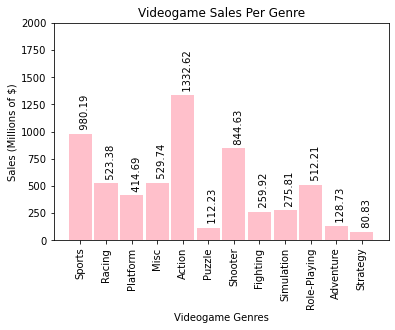

In [65]:
# Genres vs sales bar chart

indicies = list(range(len(Videogame_Genres)))
barpositions = list(range(len(Videogame_Genres)))
y = list(genre_sales.values())
labels = list(genre_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,2000])
plt.title('Videogame Sales Per Genre')
plt.xlabel('Videogame Genres')
plt.ylabel('Sales (Millions of $)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')


# Show the plot
plt.show()

From the above bar chart, we see that the *most popular game genre* is **Action**, followed by **Sports** and **Shooter** close behind. \
For the top three genres, we want to quickly take a look at some of the top sellers in each genre and check if there are any game series or titles that are easily recognizable. 

In [66]:
# What are the action, sports, and shooter games?

print("Action Games:")
display(dataclean.loc[dataclean['Genre'] == 'Action'])

print("Sports Games:")
display(dataclean.loc[dataclean['Genre'] == 'Sports'])

print("Shooter Games:")
display(dataclean.loc[dataclean['Genre'] == 'Shooter'])


Action Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
16,Grand Theft Auto V,2013,Action,21.04,M
17,Grand Theft Auto: San Andreas,2004,Action,20.81,M
23,Grand Theft Auto V,2013,Action,16.27,M
24,Grand Theft Auto: Vice City,2002,Action,16.15,M
38,Grand Theft Auto III,2001,Action,13.10,M
...,...,...,...,...,...
16658,Ben 10 Omniverse 2,2013,Action,0.01,E10+
16667,E.T. The Extra-Terrestrial,2001,Action,0.01,E
16676,Metal Gear Solid V: The Definitive Experience,2016,Action,0.01,M
16696,Metal Gear Solid V: Ground Zeroes,2014,Action,0.01,M


Sports Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,2006,Sports,82.53,E
3,Wii Sports Resort,2009,Sports,32.77,E
13,Wii Fit,2007,Sports,22.70,E
15,Wii Fit Plus,2009,Sports,21.79,E
77,FIFA 16,2015,Sports,8.57,E
...,...,...,...,...,...
16555,Winning Eleven: Pro Evolution Soccer 2007,2006,Sports,0.01,E
16566,Outdoors Unleashed: Alaska 3D,2011,Sports,0.01,T
16642,Tour de France 2014,2014,Sports,0.01,E
16647,Rugby Challenge 3,2016,Sports,0.01,E


Shooter Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
29,Call of Duty: Modern Warfare 3,2011,Shooter,14.73,M
32,Call of Duty: Black Ops,2010,Shooter,14.61,M
34,Call of Duty: Black Ops II,2012,Shooter,13.79,M
35,Call of Duty: Black Ops II,2012,Shooter,13.67,M
36,Call of Duty: Modern Warfare 2,2009,Shooter,13.47,M
...,...,...,...,...,...
16433,Greg Hastings' Tournament Paintball Max'd,2006,Shooter,0.01,E10+
16541,Clive Barker's Jericho,2007,Shooter,0.01,M
16581,Space Raiders,2003,Shooter,0.01,T
16700,Breach,2011,Shooter,0.01,T


**Action Games**: \
Here we see that we have a total of 2146 rows, meaning that there are 2146 games that are classed as being Action games. The first give games printed 

...

...

...

#### Normalized Bar Chart for Genre and Sales

In [67]:
# Create a new normalized dictionary to hold normalized_genre_sales
normalized_genre_sales = {    
}

for word in Videogame_Genres:
    normalized_genre_sales[word] = round(genre_sales[word]/len(dataclean.loc[dataclean['Genre'] == word]), 2)
    
print(normalized_genre_sales)


{'Sports': 0.66, 'Racing': 0.61, 'Platform': 0.74, 'Misc': 0.61, 'Action': 0.62, 'Puzzle': 0.33, 'Shooter': 0.85, 'Fighting': 0.6, 'Simulation': 0.49, 'Role-Playing': 0.67, 'Adventure': 0.29, 'Strategy': 0.24}


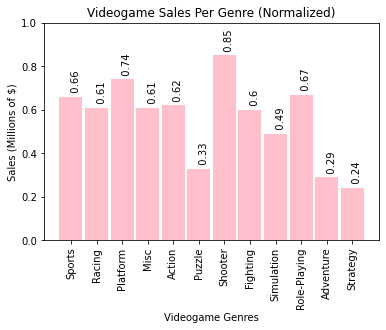

In [68]:
# Genres vs sales bar chart

indicies = list(range(len(Videogame_Genres)))
barpositions = list(range(len(Videogame_Genres)))
y = list(normalized_genre_sales.values())
labels = list(normalized_genre_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,1.0])
plt.title('Videogame Sales Per Genre (Normalized)')
plt.xlabel('Videogame Genres')
plt.ylabel('Sales (Millions of $)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')


# Show the plot
plt.show()

#### Videogame Sales Based on Rating
*edit*
The second question we want to address is to see which videogame genres sell the best! This can be done by looking into the column with the videogame **Genre** in the clean dataset and then look into the **Global_Sales** column. The idea to answer this question is to find the unique genres in the **Genre** column and then have a running sum for the values  for that row in the **Global_Sales** column.

In the same way...

In [69]:
# Begin setting up a dictionary for the rating_sales

# Creates the rating_sales dictionary
rating_sales = {    
}

# Takes the indicies of the dataclean dataframe
index = dataclean.index

# For each entry in the unique genres list (Videogame_Ratings), 
# we want to make a new dictonary word and set it equal to 0 entries
for word in Videogame_Ratings:
    rating_sales[word] = 0

# We want to move through the rows in the indicies here...
for rownumber in dataclean.index:
    # and store the respecitive values for that row from the rating column and sales column...
    ratingtype = dataclean.Rating[rownumber]
    gamesales = dataclean.Global_Sales[rownumber]
    # now check for the item in Videogame_Ratings...
    for uniquerating in Videogame_Ratings:
        # if they are both equal
        if uniquerating == ratingtype:
            # then add the value in the game sales column to that rating letter stored in the dictionary!
            rating_sales[uniquerating] += gamesales

# Format the values attached to the dictionary keys so that they have two decimal points (like in the original dataset)
for key in rating_sales:
    rating_sales[key] = round(rating_sales[key], 2)
    
print(rating_sales)

{'E': 2413.29, 'M': 1462.6, 'T': 1474.13, 'E10+': 641.2, 'AO': 1.95, 'EC': 1.78, 'RP': 0.03}


#### Rating_Sales Dictionary

Above, we created a rating_sales dictionary that holds every unique genre present in the dataset, and has the respecitive summation of all the sales made for that specific rating! \
From this, we can proceed to making a bar chart based on what is stored in this dictionary.

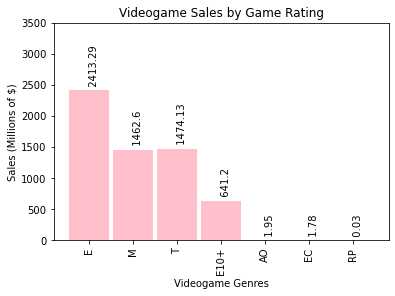

In [70]:
# CAN IMPROVE THIS!

# Ratings vs sales bar chart

indicies = list(range(len(Videogame_Genres)))
barpositions = list(range(len(Videogame_Ratings)))
y = list(rating_sales.values())
labels = list(rating_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,3500])
plt.title('Videogame Sales by Game Rating')
plt.xlabel('Videogame Genres')
plt.ylabel('Sales (Millions of $)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')


# Show the plot
plt.show()

discussion!

Normalize the Sales by Rating 

In [71]:
# Create a new normalized dictionary to hold normalized_genre_sales
normalized_rating_sales = {    
}

for word in Videogame_Ratings:
    normalized_rating_sales[word] = round(rating_sales[word]/len(dataclean.loc[dataclean['Rating'] == word]), 2)
    
print(normalized_rating_sales)

{'E': 0.61, 'M': 0.95, 'T': 0.51, 'E10+': 0.46, 'AO': 1.95, 'EC': 0.22, 'RP': 0.03}


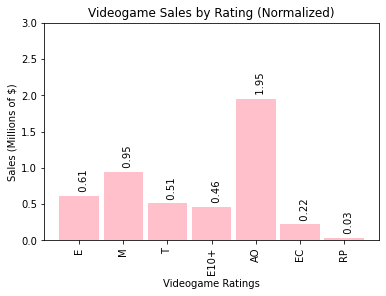

In [72]:
# Genres vs sales bar chart

indicies = list(range(len(Videogame_Ratings)))
barpositions = list(range(len(Videogame_Ratings)))
y = list(normalized_rating_sales.values())
labels = list(normalized_rating_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,3.0])
plt.title('Videogame Sales by Rating (Normalized)')
plt.xlabel('Videogame Ratings')
plt.ylabel('Sales (Millions of $)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')


# Show the plot
plt.show()

GTA San Adreas is the only AO game, a someone accessed hidden code in the game and activated it

### Find the games that had the first ratings



In [120]:

min_year_index = dataclean[['Year_of_Release']].idxmin()
min_year_game = dataclean['Name'][min_year_index].item()
min_year_platform = rawdata['Platform'][min_year_index].item()

print('The earliest game on the list is:', min_year_game)
print('It was originally released in', dataclean['Year_of_Release'].min())
print('It was rereleased on the', min_year_platform, 'platform')


The earliest game on the list is: Alter Ego
It was originally released in 1985
It was rereleased on the PC platform


In [116]:
dataclean.Year_of_Release.sort_values(ascending=True)

14472    1985
14623    1988
2612     1992
14612    1992
1567     1994
         ... 
15200    2016
1056     2016
11584    2016
2056     2016
5936     2020
Name: Year_of_Release, Length: 9769, dtype: int64